# N vs N-1 variance and standard deviation

This is a short worksheet to explore the difference between the N and N-1 definition of variance and the standard deviation. Look at the notes first. Note especially that to obtain the variance of a given sample, you always use the "N" version. The N-1 version is interesting if you want to estimate, from your finite sample, the variance of a theoretical "parent distribution". As estimator for the variance of the parent distribution, the N-1 version of the variance is claimed to be unbiased, while the N version is biased. I also mention (in the supplementary section), that, counter-intuitively, the biased version is on average closer to the truth. Let's investigate this, by generating some random distributions with known variances, and see how well averaging over repeated experiments will reproduce this true value.

## Generating Gaussian-distributed random numbers

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

After importing some useful headers for math and plotting, let's generate some random numbers and plot them

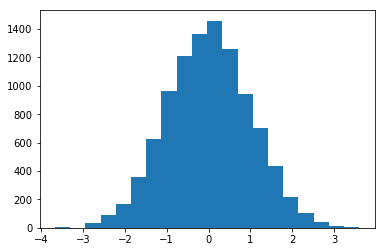

In [2]:
numbers = np.random.randn(10000) #Return a sample of 10000 numbers from “standard normal” (mean 0, sigma 1) distribution.
h=plt.hist(numbers, 20) # make histogram of this with 20 bins
plt.show()

## Calculating mean, variance, sigma

Let's calcuate mean, variance and sigma for the above sample

In [3]:
sum=0
sumsq=0
for x in numbers:
    sum+=x
    sumsq+=x*x
N=numbers.size
mean=sum/N
meansq=sumsq/N
variance = meansq - mean*mean
sigma = sqrt(variance)
print("mean = ", mean, ", variance = ", variance, ", sigma = ", sigma)

mean =  0.00960262236417 , variance =  0.997269741739 , sigma =  0.998633937806362


Let's compare variance and sigma with the N-1 versions thereof:

In [4]:
V_nminus1 = variance * N/(N-1)
sigma_nminus1 = sqrt(V_nminus1)
print("Vn=", variance, " Vn-1=", V_nminus1, "; sigma=", sigma, "sigma_n-1=", sigma_nminus1)

Vn= 0.997269741739  Vn-1= 0.997369478687 ; sigma= 0.998633937806362 sigma_n-1= 0.9986838732484418


As expected, the difference is hardly noticeable. We have a large sample, N/(N-1) is nearly 1.

## Cleaning up the code in preparation for the big bias study

Now let's write a function that generates N events and calcualtes the n and n-1 versions of variance and sigma. We will also tidy the code up a bit and write a function that calculates variances and sigmas for any dataset

In [5]:
def VandSigma_NandNminus1(dataset):
    sum=0
    sumsq=0
    for x in dataset:
        sum+=x
        sumsq+=x*x
    N=len(dataset)
    mean=sum/N
    meansq=sumsq/N
    V = meansq - mean*mean
    sigma = sqrt(V)
    V_nm1 = V * N/(N-1)
    sigma_nm1 = sqrt(V_nm1)
    return (V, sigma, V_nm1, sigma_nm1)

def generateGauss_calculate_variances_sigmas(NumberOfEvents, bins=-1):
    numbers = np.random.randn(NumberOfEvents)
    if bins > 0:
        h=plt.hist(numbers, bins) # make histogram of this with 20 bins
        plt.show()
    return VandSigma_NandNminus1(numbers)

Let's see what it does:

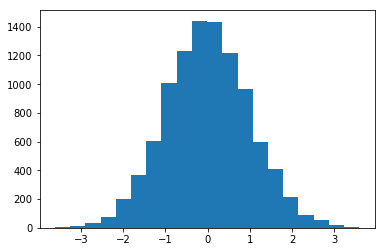

V    	= 0.992088279005 , sigma   	=  0.9960362839802134 
V(n-1)	= 0.992187497755 , sigma(n-1) 	=  0.9960860895298597


In [6]:
(V, sigma, V_nm1, sigma_nm1) = generateGauss_calculate_variances_sigmas(10000, 20)
print("V    \t=", V, ", sigma   \t= ", sigma, "\nV(n-1)\t=", V_nm1, ", sigma(n-1) \t= ", sigma_nm1)

## The Big Bias Study

Now let's generate only small number of events, say 10.

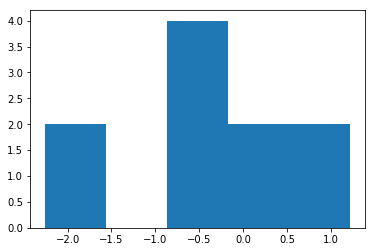

V    	= 1.1432433448 , sigma   	=  1.0692255818106964 
V(n-1)	= 1.27027038311 , sigma(n-1) 	=  1.1270627236801678


In [7]:
N_evt=10 # number of events
(V, sigma, V_nm1, sigma_nm1) = generateGauss_calculate_variances_sigmas(N_evt, 5)
print("V    \t=", V, ", sigma   \t= ", sigma, "\nV(n-1)\t=", V_nm1, ", sigma(n-1) \t= ", sigma_nm1)

Now the difference between the N and the N-1 versions matters at least a bit. Let's repeat this very often, and plot/print what comes out:


Variances


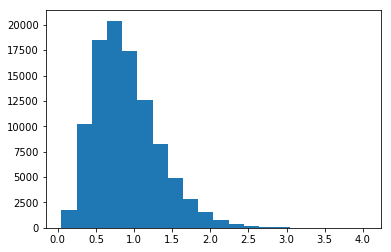

0.899714905574 +- 0.00148860311734


V(n-1) Variances


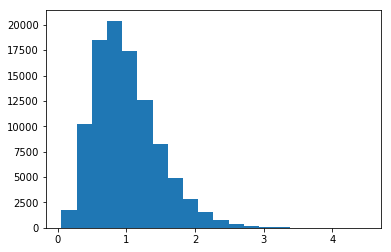

0.999683228415 +- 0.00148860311734


Sigma


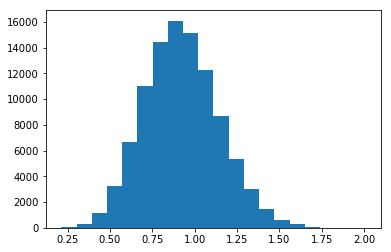

0.922576645968 +- 0.00148860311734


N-1 Sigma


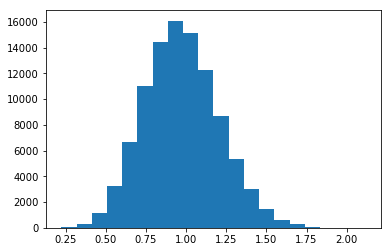

0.972481172446 +- 0.00148860311734


In [8]:
def BiasStudy(Num_Experiments, NumEventsPerExperiment, generator):
    (VList, SList, Vmn1List, Smn1List)=([],[],[],[]) # a tuple of 4 lists with results
    for counter in range(Num_Experiments):
        (V, S, Vmn1, Smn1) = generator(10) #generateGauss_calculate_variances_sigmas(10)
        VList.append(V)
        SList.append(S)
        Vmn1List.append(Vmn1)
        Smn1List.append(Smn1)
        
    return (VList, SList, Vmn1List, Smn1List)

def printStats(dataset):
    h1=plt.hist(dataset, 20)
    plt.show()
    print(np.mean(dataset), "+-", np.std(Vmn1List)/sqrt( len(dataset) ))

N_exp=100000 # number of experiments - I'll re-use this below for other random distributions

VList, SList, Vmn1List, Smn1List = BiasStudy(N_exp, N_evt, generateGauss_calculate_variances_sigmas)

print("\nVariances")
printStats(VList)
print("\n\nV(n-1) Variances")
printStats(Vmn1List)

print("\n\nSigma")
printStats(SList)
print("\n\nN-1 Sigma")
printStats(Smn1List)

The study above shows that the N-variance is indeed biased, while the N-1 variance does not seem to be biased. Interestingly, both the sigma and the n-1 sigma are biased, but the latter less so.

Now what about my claim that although the V_n is biased, it would on average be closer to the true value? Let's check. For this we calculate the average distance squared from the "true" value (which is 1)

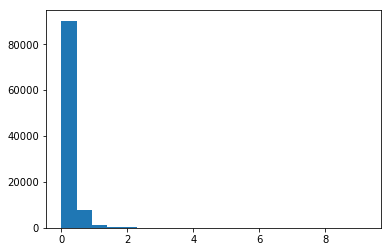

0.189548178682 +- 0.00148860311734


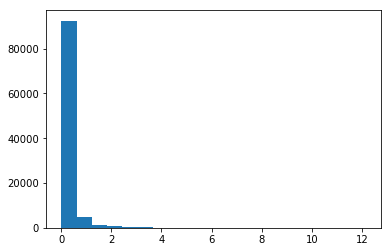

0.22159402444 +- 0.00148860311734


In [9]:
difflist_V = [ (x - 1)**2 for x in VList]
difflist_Vmn1 = [ (x - 1)**2 for x in Vmn1List]
printStats(difflist_V)
printStats(difflist_Vmn1)

So indeed, while the usual V is biased, on average it is closer to the true value than the N-1 version.

# Other random distributions

What if the distribution is not Gaussian? The picture remains pretty consistent. See below we try an exponential with a true V=1, sigam=1, and a flat distribution with a true V = 1/12 and sigma = 1/sqrt(12)

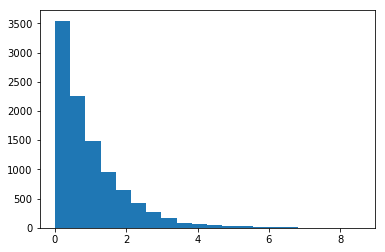

V    	= 0.945933877281 , sigma   	=  0.9725913207927077 
V(n-1)	= 0.946028480129 , sigma(n-1) 	=  0.9726399540062688


In [10]:
def generateExp_calculate_variances_sigmas(NumberOfEvents, bins=-1):
    numbers = np.random.exponential(1,NumberOfEvents)
    if bins > 0:
        h=plt.hist(numbers, bins) # make histogram of this with 20 bins
        plt.show()
    return VandSigma_NandNminus1(numbers)

(V, sigma, V_nm1, sigma_nm1) = generateExp_calculate_variances_sigmas(10000, 20)
print("V    \t=", V, ", sigma   \t= ", sigma, "\nV(n-1)\t=", V_nm1, ", sigma(n-1) \t= ", sigma_nm1)


Variances


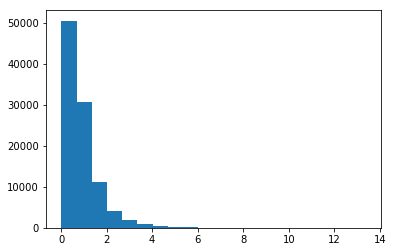

0.89806186863 +- 0.00283953513006


V(n-1) Variances


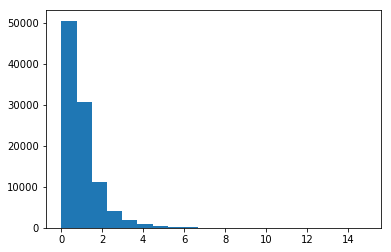

0.9978465207 +- 0.00283953513006


Sigma


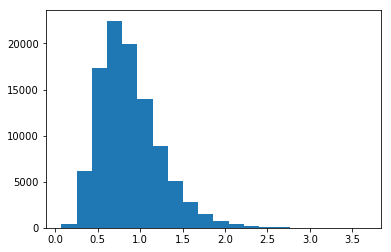

0.876036447206 +- 0.00283953513006


N-1 Sigma


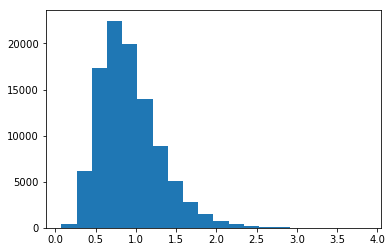

0.923423495498 +- 0.00283953513006


In [11]:
VList, SList, Vmn1List, Smn1List = BiasStudy(N_exp, N_evt, generateExp_calculate_variances_sigmas)

print("\nVariances")
printStats(VList)
print("\n\nV(n-1) Variances")
printStats(Vmn1List)

print("\n\nSigma")
printStats(SList)
print("\n\nN-1 Sigma")
printStats(Smn1List)

Flat with variance = 1/12

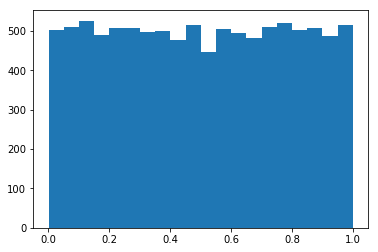

V    	= 0.0842697185778 , sigma   	=  0.290292470756278 
V(n-1)	= 0.0842781463924 , sigma(n-1) 	=  0.2903069864685033
'true' V =  0.08333333333333333 , sigma =  0.28867513459481287


In [12]:
def generateFlat_calculate_variances_sigmas(NumberOfEvents, bins=-1):
    numbers = np.random.random(NumberOfEvents)
    if bins > 0:
        h=plt.hist(numbers, bins) # make histogram of this with 20 bins
        plt.show()
    return VandSigma_NandNminus1(numbers)

(V, sigma, V_nm1, sigma_nm1) = generateFlat_calculate_variances_sigmas(10000, 20)
print("V    \t=", V, ", sigma   \t= ", sigma, "\nV(n-1)\t=", V_nm1, ", sigma(n-1) \t= ", sigma_nm1)
print("'true' V = ", 1/12, ", sigma = ", sqrt(1/12))



Variances


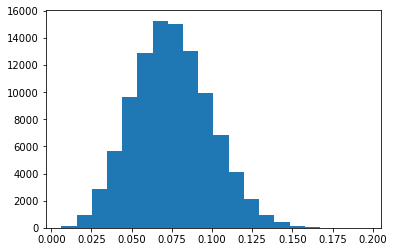

0.0750320219376 +- 8.44290824245e-05
('true' V =  0.08333333333333333 )


V(n-1) Variances


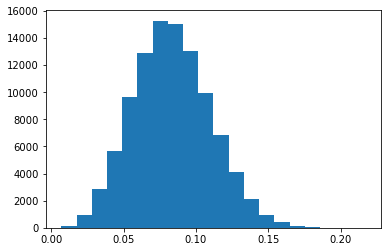

0.083368913264 +- 8.44290824245e-05
('true' V =  0.08333333333333333 )


Sigma


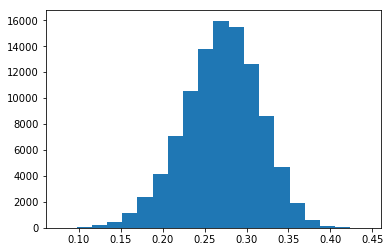

0.270178299908 +- 8.44290824245e-05
('true' sigma =  0.2886751345948129 )


N-1 Sigma


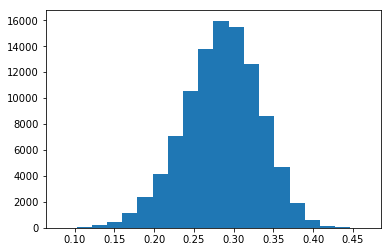

0.284792934021 +- 8.44290824245e-05
('true' sigma =  0.2886751345948129 )


In [13]:
VList, SList, Vmn1List, Smn1List = BiasStudy(N_exp, N_evt, generateFlat_calculate_variances_sigmas)

print("\nVariances")
printStats(VList)
print("('true' V = ", 1/12,")")

print("\n\nV(n-1) Variances")
printStats(Vmn1List)
print("('true' V = ", 1/12,")")

print("\n\nSigma")
printStats(SList)
print("('true' sigma = ", 1/sqrt(12),")")

print("\n\nN-1 Sigma")
printStats(Smn1List)
print("('true' sigma = ", 1/sqrt(12),")")


In summary, for the distributions we tried out here, the N variance is biased and our results are consistent with an unbiased N-1 variance. The sigmas are both biased, but again, the N-1 sigma less so. But, counter-intuitively, on average, the (biased) N variance is closer to the truth than the (unbiased) N-1. It's a trade off.